# Figure 3: Histogram comparing sampling strategies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import pmagpy.pmag as pmag
import pmagpy.ipmag as ipmag

import smpsite as smp

import warnings 
warnings.filterwarnings('ignore')

%matplotlib inline

### Run simulation

This notebook also includes how to run the simulation for the histograms. 

In [2]:
%%time

angular_dispersio_within_site = 10 # degrees
kappa_within_site = smp.angular2kappa(angular_dispersio_within_site)
latitude = 30
outlier_rate = 0.10
n_iters = 5000

params1 = smp.Params(N=100,
                     n0=1,
                     kappa_within_site=kappa_within_site,
                     site_lat=latitude, 
                     site_long=0,
                     outlier_rate=outlier_rate,
                     secular_method="G",
                     kappa_secular=None)

params2 = smp.Params(N=20,
                     n0=5,
                     kappa_within_site=kappa_within_site,
                     site_lat=latitude, 
                     site_long=0,
                     outlier_rate=outlier_rate,
                     secular_method="G",
                     kappa_secular=None)

df_false    = smp.simulate_estimations(params1, n_iters=n_iters, ignore_outliers="False")
df_true     = smp.simulate_estimations(params2, n_iters=n_iters, ignore_outliers="True")
df_vandamme = smp.simulate_estimations(params1, n_iters=n_iters, ignore_outliers="vandamme")

df_false.to_csv("../../outputs/fig3a_df_false.csv")
df_true.to_csv("../../outputs/fig3a_df_true.csv") 
df_vandamme.to_csv("../../outputs/fig3a_df_vandamme.csv") 

CPU times: user 33min 41s, sys: 123 ms, total: 33min 41s
Wall time: 33min 41s


### Figure

In [9]:
# panel = 'a'
# panel = 'b'
panel = 'c'

df_false = pd.read_csv("../../outputs/fig3"+panel+"_df_false.csv")
df_true = pd.read_csv("../../outputs/fig3"+panel+"_df_true.csv")
df_vandamme = pd.read_csv("../../outputs/fig3"+panel+"_df_vandamme.csv")

In [10]:
df_true

,Unnamed: 0,plong,plat,total_samples,samples_per_sites,S2_vgp,error_angle,S2_vgp_real,n_tot,N,n0,kappa_within_site,site_lat,site_long,outlier_rate,secular_method,kappa_secular,ignore_outliers
0,0,190.306018,84.314629,36.0,5,218.096967,5.685371,191.7229,100,20,5,66.069981,30,0,0.6,G,NaN,True
1,1,55.662167,85.483652,34.0,5,215.659161,4.516348,191.7229,100,20,5,66.069981,30,0,0.6,G,NaN,True
2,2,193.984859,86.462183,34.0,5,265.162109,3.537817,191.7229,100,20,5,66.069981,30,0,0.6,G,NaN,True
3,3,358.720274,86.835100,34.0,5,461.786418,3.164900,191.7229,100,20,5,66.069981,30,0,0.6,G,NaN,True
4,4,224.066484,87.495521,28.0,5,206.023724,2.504479,191.7229,100,20,5,66.069981,30,0,0.6,G,NaN,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4995,165.292979,84.319601,39.0,5,121.964481,5.680399,191.7229,100,20,5,66.069981,30,0,0.6,G,NaN,True
4996,4996,9.619776,87.047602,46.0,5,175.154300,2.952398,191.7229,100,20,5,66.069981,30,0,0.6,G,NaN,True
4997,4997,338.354021,85.822482,40.0,5,163.134369,4.177518,191.7229,100,20,5,66.069981,30,0,0.6,G,NaN,True
4998,4998,14.220743,87.025506,48.0,5,163.107882,2.974494,191.7229,100,20,5,66.069981,30,0,0.6,G,NaN,True


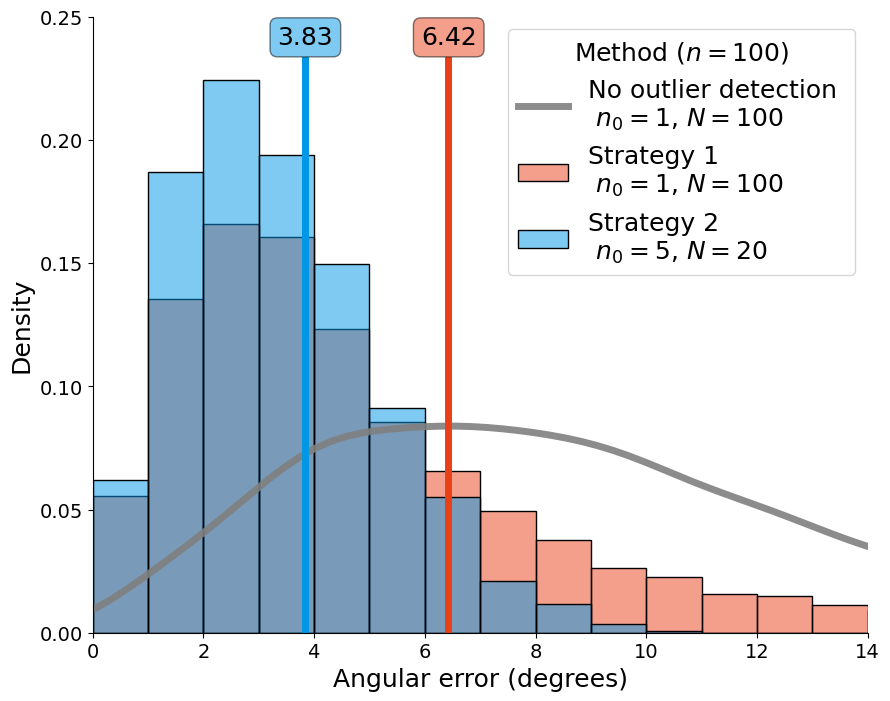

In [11]:
%matplotlib inline

if panel == 'a':
    x_max = 8
    y_max = 0.52
    bw = 0.5
elif panel == 'b':
    x_max = 8
    y_max = 0.4
    bw = 0.5
elif panel == 'c':
    x_max = 14
    y_max = 0.25
    bw = 1.0

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10,8))

# Histograms
sns.histplot(df_vandamme.error_angle, ax=axes, color='#e84118', stat='density', binwidth=bw, binrange=(0,20), alpha=.5, label="Strategy 1 \n $n_0=1$, $N=100$")
sns.histplot(df_true.error_angle, ax=axes, color='#0097e6', stat='density', binwidth=bw, binrange=(0,20), alpha=.5, label="Strategy 2 \n $n_0=5$, $N=20$")

# Density plot
sns.kdeplot(df_false.error_angle, ax=axes, color='grey', alpha=.9, lw=5, label="No outlier detection \n $n_0=1$, $N=100$")


rmse1 = np.round(np.mean(df_vandamme.error_angle**2)**.5, decimals=2)
rmse2 = np.round(np.mean(df_true.error_angle**2)**.5, decimals=2)

plt.axvline(x=rmse1, ymax=0.93, c='#e84118', lw=5)
plt.axvline(x=rmse2, ymax=0.93, c='#0097e6', lw=5)

props = dict(boxstyle='round', facecolor="#e84118", alpha=0.5)
plt.text(rmse1/x_max-0.035, 0.986, "{}".format(rmse1), transform=axes.transAxes, fontsize=18,
        verticalalignment='top', bbox=props);

props = dict(boxstyle='round', facecolor='#0097e6', alpha=0.5)
plt.text(rmse2/x_max-0.035, 0.986, "{}".format(rmse2), transform=axes.transAxes, fontsize=18,
        verticalalignment='top', bbox=props);

plt.xlim(0, x_max)
plt.ylim(0, y_max)
plt.xlabel("Angular error (degrees)", fontsize=18)
plt.ylabel("Density", fontsize=18)
plt.xticks(np.arange(0.0, x_max+0.1, 2.0), fontsize=14);
plt.yticks(fontsize=14)
plt.legend(title="Method ($n=100$)", title_fontsize=18, fontsize=18)

ax = plt.gca()
ax.spines[['right', 'top']].set_visible(False)

plt.savefig("Figure3{}.pdf".format(panel), format="pdf", bbox_inches='tight')
plt.savefig("Figure3{}.png".format(panel), format="png", bbox_inches='tight')